In [1]:
# =========================================================
# ✅ Import Core Libraries
# =========================================================
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from tqdm import tqdm

print("✅ All imports successful!")


✅ All imports successful!


In [2]:
# =========================================================
# 📁 Dataset Directory
# =========================================================
base_dir = "/kaggle/input/saad-3/Microscopic Image Dataset of Plant-Parasitic Nematodes"

# Get class folders (each genus)
classes = sorted([d for d in os.listdir(base_dir) if d.startswith("Genus")])
print("🔍 Classes found:", classes)
print("Total classes:", len(classes))


🔍 Classes found: ['Genus Criconema', 'Genus Criconemoides', 'Genus Helicotylenchus', 'Genus Hemicycliophora', 'Genus Hirschmaniella', 'Genus Hoplolaimus', 'Genus Meloidogyne', 'Genus Pratylenchus', 'Genus Radopholus', 'Genus Trichodorus', 'Genus Xiphinema']
Total classes: 11


,Class,Image_Count
0,Genus Criconema,4
1,Genus Criconemoides,103
2,Genus Helicotylenchus,135
3,Genus Hemicycliophora,6
4,Genus Hirschmaniella,130
5,Genus Hoplolaimus,151
6,Genus Meloidogyne,211
7,Genus Pratylenchus,116
8,Genus Radopholus,31
9,Genus Trichodorus,44


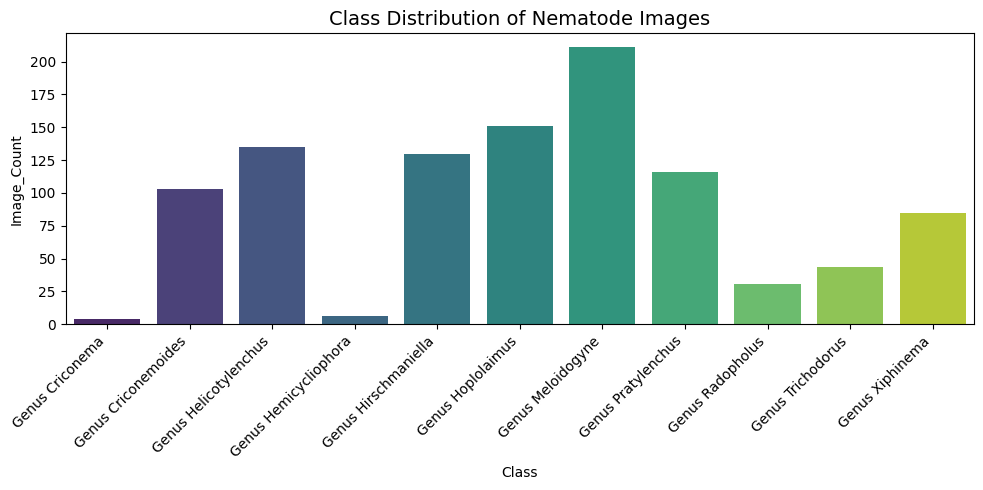

In [3]:
# =========================================================
# 📊 Count total images per class
# =========================================================
class_counts = {}
for c in classes:
    folder = os.path.join(base_dir, c)
    class_counts[c] = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image_Count"])
display(df_counts)

# Plot class balance
plt.figure(figsize=(10,5))
sns.barplot(x="Class", y="Image_Count", data=df_counts, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Class Distribution of Nematode Images", fontsize=14)
plt.tight_layout()
plt.show()


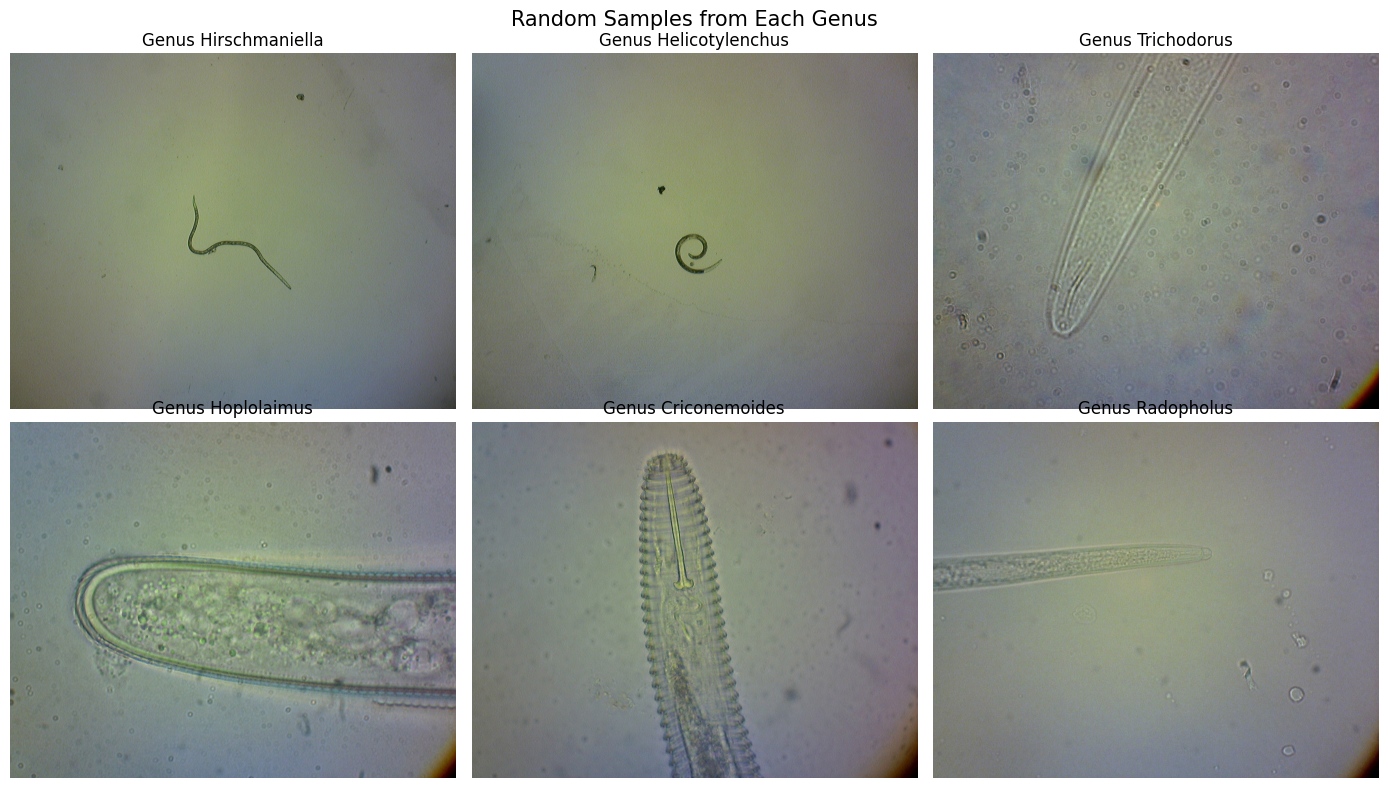

In [4]:
# =========================================================
# 🖼️ Display Random Sample from Each Class
# =========================================================
plt.figure(figsize=(14, 8))
for i, c in enumerate(random.sample(classes, min(6, len(classes)))):
    folder = os.path.join(base_dir, c)
    img_path = os.path.join(folder, random.choice(os.listdir(folder)))
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(c)
    plt.axis("off")
plt.suptitle("Random Samples from Each Genus", fontsize=15)
plt.tight_layout()
plt.show()


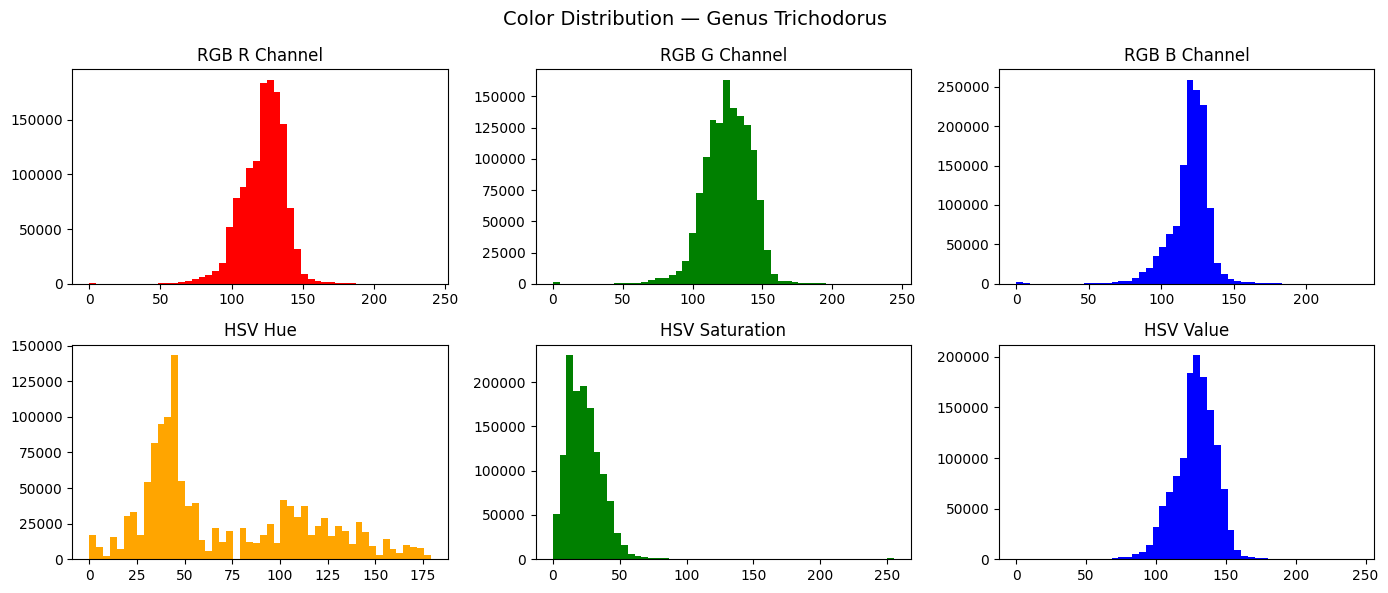

In [6]:
# Random sample image
sample_class = random.choice(classes)
folder = os.path.join(base_dir, sample_class)
sample_img_path = os.path.join(folder, random.choice(os.listdir(folder)))
img = cv2.imread(sample_img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 6))

# RGB channels
for i, col in enumerate(['r', 'g', 'b']):
    axs[0, i].hist(img_rgb[:, :, i].ravel(), bins=50, color=col)
    axs[0, i].set_title(f"RGB {col.upper()} Channel")

# HSV channels with valid colors
hsv_colors = ['orange', 'green', 'blue']
for i, (col, title) in enumerate(zip(hsv_colors, ["Hue", "Saturation", "Value"])):
    axs[1, i].hist(img_hsv[:, :, i].ravel(), bins=50, color=col)
    axs[1, i].set_title(f"HSV {title}")

plt.suptitle(f"Color Distribution — {sample_class}", fontsize=14)
plt.tight_layout()
plt.show()


Analyzing sizes: 100%|██████████| 11/11 [00:19<00:00,  1.76s/it]


,Width,Height,Aspect_Ratio
count,1016.0,1016.0,1016.00
mean,1280.0,1024.0,1.25
std,0.0,0.0,0.00
min,1280.0,1024.0,1.25
25%,1280.0,1024.0,1.25
50%,1280.0,1024.0,1.25
75%,1280.0,1024.0,1.25
max,1280.0,1024.0,1.25


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


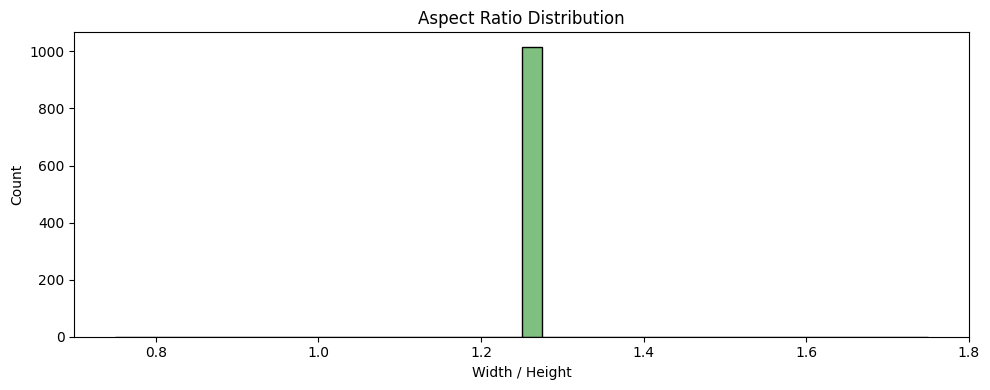

In [7]:
# =========================================================
# 📏 Resolution & Aspect Ratio
# =========================================================
widths, heights, aspects, labels = [], [], [], []

for c in tqdm(classes, desc="Analyzing sizes"):
    folder = os.path.join(base_dir, c)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                widths.append(w)
                heights.append(h)
                aspects.append(w / h)
                labels.append(c)

df_size = pd.DataFrame({
    "Class": labels,
    "Width": widths,
    "Height": heights,
    "Aspect_Ratio": aspects
})
display(df_size.describe())

plt.figure(figsize=(10,4))
sns.histplot(df_size["Aspect_Ratio"], bins=40, kde=True, color='green')
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.tight_layout()
plt.show()


In [8]:
# =========================================================
# 💡 Brightness / Contrast / Sharpness Stats
# =========================================================
brightness, contrast, sharpness, noise = [], [], [], []

for c in tqdm(classes, desc="Analyzing image stats"):
    folder = os.path.join(base_dir, c)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                brightness.append(np.mean(img))
                contrast.append(np.std(img))
                sharpness.append(cv2.Laplacian(img, cv2.CV_64F).var())
                noise.append(np.mean(np.abs(img - cv2.medianBlur(img, 3))))

df_quality = pd.DataFrame({
    "Brightness": brightness,
    "Contrast": contrast,
    "Sharpness": sharpness,
    "Noise": noise
})

display(df_quality.describe())


Analyzing image stats: 100%|██████████| 11/11 [00:23<00:00,  2.14s/it]


,Brightness,Contrast,Sharpness,Noise
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,129.879880,15.916461,180.092246,90.833101
std,10.420821,5.880197,97.408718,4.856836
min,109.010831,8.446039,16.764945,59.112138
25%,125.103331,13.601249,122.515824,90.869713
50%,128.614215,14.903629,152.152093,91.493380
75%,132.817705,16.682870,213.752095,92.599596
max,216.953376,80.950825,1133.346563,99.297388


Saturation clipping per image: 100%|██████████| 11/11 [00:19<00:00,  1.73s/it]


,Low_Saturation_%,High_Saturation_%
count,1016.000000,1016.000000
mean,0.477237,0.099232
std,0.375617,0.529210
min,0.000000,0.000000
25%,0.235577,0.004730
50%,0.447845,0.022697
75%,0.665092,0.081882
max,6.163559,9.958572


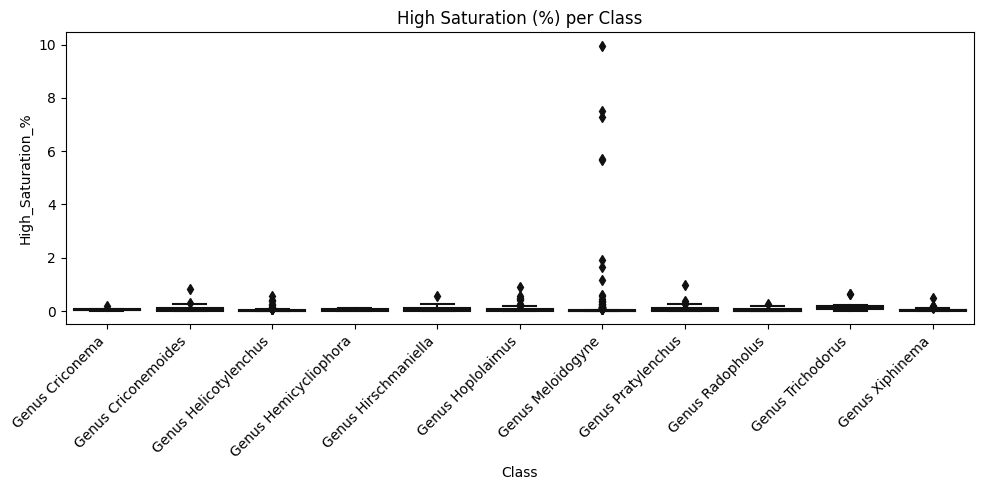

In [9]:
# =========================================================
# 🎨 Saturation clipping analysis (HSV S channel)
# =========================================================
saturation_clipping = []

for c in tqdm(classes, desc="Saturation clipping per image"):
    folder = os.path.join(base_dir, c)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path)
            if img is not None:
                hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                s = hsv[:, :, 1]
                low_clip = np.sum(s == 0) / s.size * 100
                high_clip = np.sum(s == 255) / s.size * 100
                saturation_clipping.append({
                    "Class": c,
                    "Image": f,
                    "Low_Saturation_%": low_clip,
                    "High_Saturation_%": high_clip
                })

df_saturation = pd.DataFrame(saturation_clipping)
display(df_saturation.describe())

# Plot high saturation clipping per class
plt.figure(figsize=(10,5))
sns.boxplot(x="Class", y="High_Saturation_%", data=df_saturation, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.title("High Saturation (%) per Class")
plt.tight_layout()
plt.show()


Resizing analysis: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]


,Resized_Width,Resized_Height
count,1016.0,1016.0
mean,256.0,204.0
std,0.0,0.0
min,256.0,204.0
25%,256.0,204.0
50%,256.0,204.0
75%,256.0,204.0
max,256.0,204.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


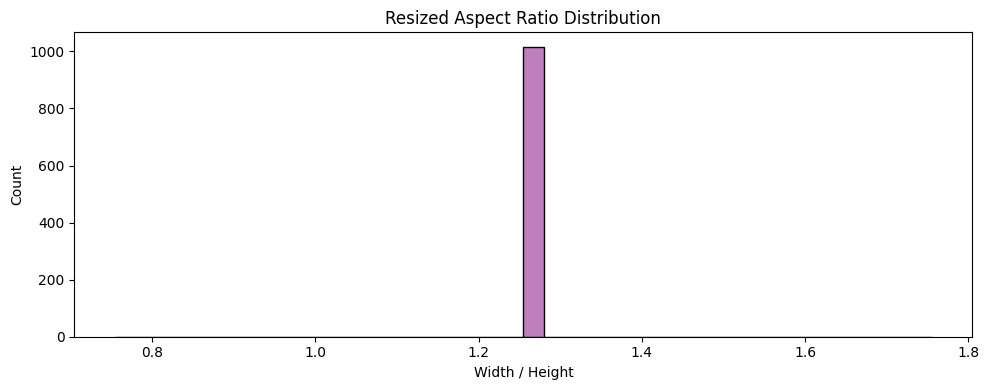

In [10]:
# =========================================================
# 📏 Resizing / padding analysis
# =========================================================
target_size = (256, 256)  # example standard size
resized_widths, resized_heights = [], []

for c in tqdm(classes, desc="Resizing analysis"):
    folder = os.path.join(base_dir, c)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                # Compute new size while maintaining aspect ratio
                scale = min(target_size[0]/h, target_size[1]/w)
                new_w, new_h = int(w*scale), int(h*scale)
                resized_widths.append(new_w)
                resized_heights.append(new_h)

df_resized = pd.DataFrame({
    "Resized_Width": resized_widths,
    "Resized_Height": resized_heights
})
display(df_resized.describe())

# Plot resized aspect ratio distribution
plt.figure(figsize=(10,4))
sns.histplot(np.array(resized_widths)/np.array(resized_heights), bins=40, kde=True, color='purple')
plt.title("Resized Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.tight_layout()
plt.show()


Gray-world check: 100%|██████████| 11/11 [00:12<00:00,  1.17s/it]


,Gray_Deviation
count,1016.000000
mean,5.877285
std,9.874826
min,0.449493
25%,2.889577
50%,4.217355
75%,5.599548
max,100.950076


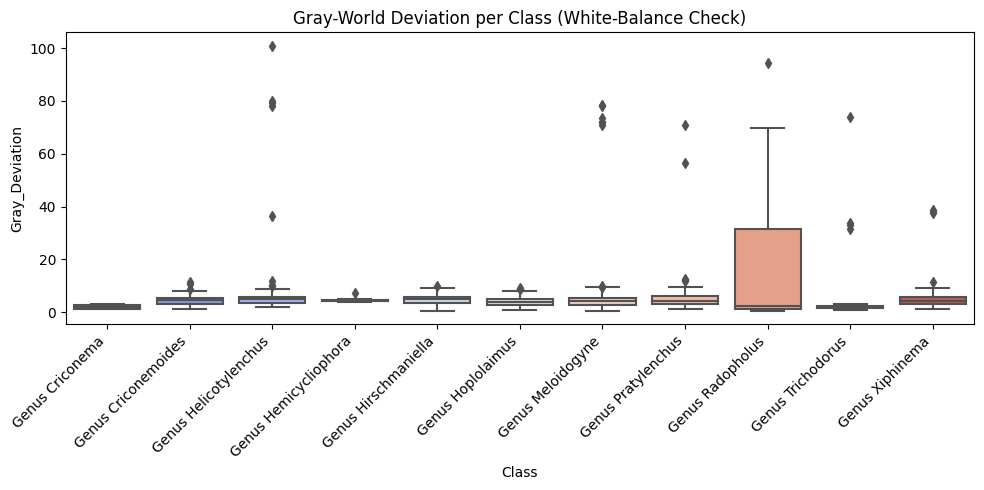

In [11]:
# =========================================================
# ⚪ Gray-world white balance sanity check
# =========================================================
gray_world_deviation = []

for c in tqdm(classes, desc="Gray-world check"):
    folder = os.path.join(base_dir, c)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path)
            if img is not None:
                mean_rgb = cv2.mean(img)[:3]  # BGR order
                # Deviation from perfect gray (all channels equal)
                deviation = np.std(mean_rgb)
                gray_world_deviation.append({
                    "Class": c,
                    "Image": f,
                    "Gray_Deviation": deviation
                })

df_gray = pd.DataFrame(gray_world_deviation)
display(df_gray.describe())

# Plot deviation per class
plt.figure(figsize=(10,5))
sns.boxplot(x="Class", y="Gray_Deviation", data=df_gray, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Gray-World Deviation per Class (White-Balance Check)")
plt.tight_layout()
plt.show()


In [13]:
# =========================================================
# 🔍 Duplicate detection using phash
# =========================================================
from collections import defaultdict
import imagehash
from PIL import Image

hash_dict = defaultdict(list)
duplicates = []

for c in tqdm(classes, desc="Computing phash"):
    folder = os.path.join(base_dir, c)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, f)
            try:
                img = Image.open(img_path)
                h = imagehash.phash(img)
                if h in hash_dict:
                    duplicates.append((f, hash_dict[h]))
                hash_dict[h].append(f)
            except:
                continue

print(f"Total potential duplicates found: {len(duplicates)}")


Computing phash: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it]

Total potential duplicates found: 54


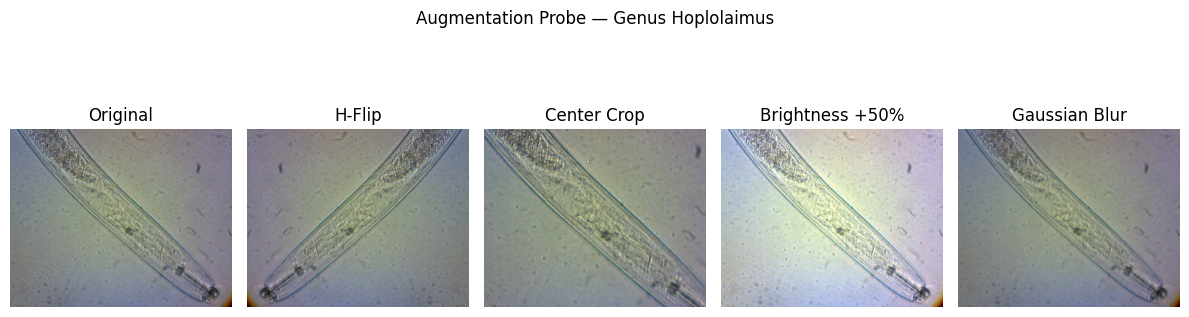

In [16]:
# =========================================================
# 🔄 Small augmentation probe
# =========================================================
from PIL import ImageEnhance, ImageFilter

sample_class = random.choice(classes)
folder = os.path.join(base_dir, sample_class)
img_path = os.path.join(folder, random.choice(os.listdir(folder)))
img = Image.open(img_path)

plt.figure(figsize=(12,4))
plt.subplot(1,5,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

# Horizontal flip
plt.subplot(1,5,2)
plt.imshow(img.transpose(Image.FLIP_LEFT_RIGHT))
plt.title("H-Flip")
plt.axis("off")

# Random crop
plt.subplot(1,5,3)
w, h = img.size
crop_img = img.crop((w//8, h//8, w*7//8, h*7//8))
plt.imshow(crop_img)
plt.title("Center Crop")
plt.axis("off")

# Brightness increase
plt.subplot(1,5,4)
enh = ImageEnhance.Brightness(img).enhance(1.5)
plt.imshow(enh)
plt.title("Brightness +50%")
plt.axis("off")

# Blur
plt.subplot(1,5,5)
blur = img.filter(ImageFilter.GaussianBlur(radius=2))
plt.imshow(blur)
plt.title("Gaussian Blur")
plt.axis("off")

plt.suptitle(f"Augmentation Probe — {sample_class}")
plt.tight_layout()
plt.show()
